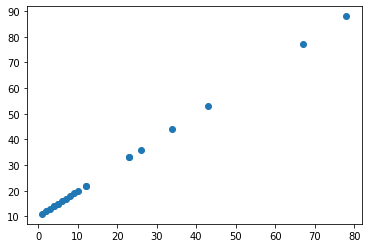

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,12,34,23,23,12,4,5,67,43,26,78], dtype=np.float32)
y = x+10

plt.scatter(x,y)

In [39]:
tf.random.set_seed(22)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
    ])
model.compile(loss=tf.keras.losses.mae, 
optimizer= tf.keras.optimizers.SGD(),
metrics=['mae'])

model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 270ms/step - loss: 30.6910 - mae: 30.6910
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 27.3721 - mae: 27.3721
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 24.0532 - mae: 24.0532
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 20.7342 - mae: 20.7342
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 17.4153 - mae: 17.4153
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 14.0964 - mae: 14.0964
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7774 - mae: 10.7774
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5221 - mae: 7.5221
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0168 - mae: 7.0168
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.0109 - mae: 7.0109
Epoch 11/100
1/1 [==============================] - 0s 4ms/step

In [44]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(100, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(100, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(1)
    ])
    
model2.compile(
    loss=tf.keras.losses.mae, 
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0045),
    metrics=['mae'])

model2.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 519ms/step - loss: 29.0721 - mae: 29.0721
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 25.6394 - mae: 25.6394
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 22.8904 - mae: 22.8904
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 20.0045 - mae: 20.0045
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 16.7295 - mae: 16.7295
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 12.8464 - mae: 12.8464
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2527 - mae: 8.2527
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0683 - mae: 7.0683
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4191 - mae: 9.4191
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9542 - mae: 10.9542
Epoch 11/100
1/1 [==============================] - 0s 4ms/step

In [45]:
model.predict([20,24]), model2.predict([20,24])

1/1 [==============================] - 0s 77ms/step


(array([[25.674433],
        [30.663607]], dtype=float32),
 array([[30.250961],
        [34.333504]], dtype=float32))